In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


In [5]:
# Criando uma tabela de frequência cruzada
freq_table = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
freq_table.columns = ['Saudáveis', 'Doentes', 'Total']
print(freq_table)

     Saudáveis  Doentes  Total
sex                           
0.0         72       25     97
1.0         92      114    206
All        164      139    303


In [6]:
# Quantidade média de doentes em %
qmd = freq_table.loc['All','Doentes']/freq_table.loc['All','Total']
qmd.round(2)*100

46.0

In [7]:
# ODDS (chance)
freq_table['odds'] = freq_table['Doentes']/freq_table['Saudáveis']
freq_table

,Saudáveis,Doentes,Total,odds
sex,,,,
0.0,72,25,97,0.347222
1.0,92,114,206,1.239130
All,164,139,303,0.847561


In [8]:
# ODDS Ratio (Razão de chances)
freq_table['RC_vs_Saudáveis'] = freq_table['odds']/freq_table.loc['All','odds']
freq_table

,Saudáveis,Doentes,Total,odds,RC_vs_Saudáveis
sex,,,,,
0.0,72,25,97,0.347222,0.409672
1.0,92,114,206,1.239130,1.461996
All,164,139,303,0.847561,1.000000


In [9]:
# Logito (log odds)
freq_table['logito'] = np.log(freq_table['odds'])
freq_table

,Saudáveis,Doentes,Total,odds,RC_vs_Saudáveis,logito
sex,,,,,,
0.0,72,25,97,0.347222,0.409672,-1.057790
1.0,92,114,206,1.239130,1.461996,0.214410
All,164,139,303,0.847561,1.000000,-0.165392


In [10]:
# WOE (log do RC)
freq_table['woe'] = np.log(freq_table['RC_vs_Saudáveis'])
freq_table

,Saudáveis,Doentes,Total,odds,RC_vs_Saudáveis,logito,woe
sex,,,,,,,
0.0,72,25,97,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


In [15]:
# Obter as idades únicas
idades_unicas = sorted(df['age'].unique())

# Obter a menor e a maior idade
menor_idade = df['age'].min()
maior_idade = df['age'].max()

# Exibir os resultados
print("Idades únicas:", idades_unicas)
print("Menor idade:", menor_idade)
print("Maior idade:", maior_idade)

Idades únicas: [29.0, 34.0, 35.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 74.0, 76.0, 77.0]
Menor idade: 29.0
Maior idade: 77.0


In [21]:
# Definindo os limites dos grupos de idade
bins = [29, 39, 48, 57, 66, np.inf]
labels = ['29-38', '39-47', '48-56', '57-65', '66+']

# Criando uma nova coluna com a categoria de idade
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_group
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,57-65
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,66+
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,66+
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,29-38
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,39-47


In [23]:
# Agrupando os dados por grupo de idade
grupo = df.groupby('age_group')

C:\Users\Bruno PC\AppData\Local\Temp\ipykernel_14636\2267880099.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = df.groupby('age_group')


In [29]:
# Calculando as estatísticas para cada grupo
stats = grupo.agg({
    'flag_doente': ['sum', 'size'],
    'age': 'mean'
})

In [31]:
# Renomeando as colunas
stats.columns = ['Doentes', 'Total', 'Idade Média']

In [39]:
# Calculando odds, odds ratio, logito e WOE
stats['Odds'] = stats['Doentes'] / (stats['Total'] - stats['Doentes'])
stats['Odds Ratio'] = stats['Odds'] / stats['Total'].mean()
stats['Logito'] = np.log(stats['Odds'])
stats['WOE'] = np.log(stats['Odds Ratio'])

#print(stats)
stats = pd.DataFrame(stats)
stats

,Doentes,Total,Idade Média,Odds,Odds Ratio,Logito,WOE
age_group,,,,,,,
29-38,4,14,36.714286,0.400000,0.006623,-0.916291,-5.017280
39-47,20,67,43.985075,0.425532,0.007045,-0.854415,-4.955404
48-56,41,97,53.567010,0.732143,0.012122,-0.311780,-4.412769
57-65,61,98,61.295918,1.648649,0.027296,0.499956,-3.601033
66+,13,26,69.307692,1.000000,0.016556,0.000000,-4.100989


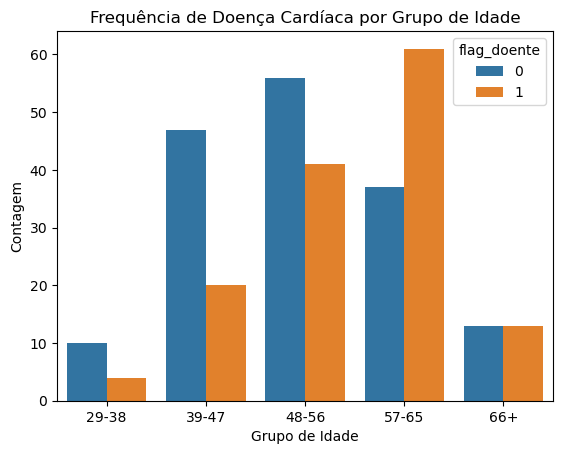

In [41]:
# Gráfico de barras empilhadas
sns.countplot(x='age_group', hue='flag_doente', data=df)
plt.title('Frequência de Doença Cardíaca por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Contagem')
plt.show()

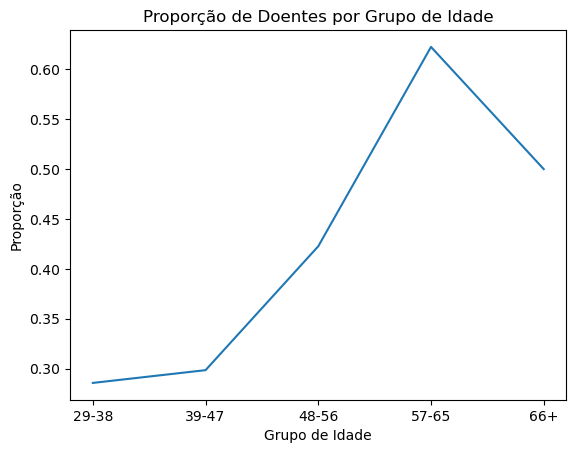

In [45]:
# Criando a coluna de proporção
stats['Proporcao_Doentes'] = stats['Doentes'] / stats['Total']

# Gráfico de linhas
sns.lineplot(x='age_group', y='Proporcao_Doentes', data=stats)
plt.title('Proporção de Doentes por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Proporção')
plt.show()